# **Introducción**


**Contexto de Negocio**

¿Cuáles son las razones por las que las personas pueden cancelar las reservas de hotel?
Los nuevos canales de reserva online en hoteles han cambiado drásticamente la gestión de reserva y el comportamiento de los clientes. Un gran número de reservas de hotel son modificadas diariamente debido a cancelaciones o abstenciones. Las razones típicas de cancelaciones son por cambio de planes, conflictos de programación, entre otras. Esto a menudo se hace más fácil por la opción de hacerlo de forma gratuita o, preferiblemente, a un bajo costo, lo que es beneficioso para los huéspedes del hotel, pero es un factor menos beneficioso y que posiblemente aumente los costos para los hoteles.

El costo de la cancelación de las reservas recae en el hotel, donde debe disponer de tiempo y recursos para resolver el problema. ¿Cómo podemos averiguar qué reservas tienen una mayor probabilidad de ser canceladas para que podamos tomar medidas preventivas para evitar que se desperdicie tiempo y recursos adicionales?

**Problema de Negocio**

Debemos responder, ¿Qué características son más importantes para determinar si un cliente cancelara una reserva?

**Contexto analítico**

Tenemos disponible los siguientes datos que han sido recopilados por la empresa:
1.  El archivo “Hotel Reservations.csv” contiene el historial de las reservas realizadas en el Hotel
Como primer paso, (1) se analizarán los datos existentes, detectando posibles deficiencias, (2) se extraerán los datos y se realizara limpieza de datos, EDA, entre otros y por ultimo (3) se creara un modelo predictivo en base a la identificación de patrones.

**Procedimiento de análisis**

El trabajo se enfocará en un modelo de predicciones para luego interpretar los datos obtenidos, con la finalidad de detectar la probabilidad de cancelación de las reservas.
En una primera etapa, verificaremos la/las variables que mejor explican si un cliente tiene tendencia a cancelar la reserva, como puede cantidad de personas, hijos, pedidos especiales, forma de reserva, entre otras.
Una vez definidas las variables claves armaremos los modelos y seleccionaremos el que mejor se ajuste a la realidad del negocio

Mediante el modelo obtenido, el hotel podrá predecir la probabilidad de cancelación de reservas de los **clientes**, con el fin de personalizar las campañas publicitarias y realizar mejor en los productos, servicios y atención brindada.


## Preguntas de interés

* Cuales variables debo analizar para reducir la cantidad de cancelaciones en las reservas de alojamiento?
* Puedo hacer algo desde mi lugar para disminuir la cantidad de cancelaciones en las reservas?
* Dispongo de suficiente información para crear un Modelo predictivo acerca de las cancelaciones de reservas de Hotel?
* En caso de querer invertir dinero en el Hotel, puedo enfocarme en las variables con mayor correlación negativa respecto a las cancelaciones?









# **StoryTelling Reservas para vacaciones de Invierno**

Dentro de los próximos meses, iniciaran las vacaciones de inviernos y todos los Hoteles de Mendoza se encuentran con una ocupación del 100% en sus reservas. Ante esta particularidad post pandemia, donde las personas quieren vacacionar fuera de las ciudades, un Hotel muy reconocido de Bariloche está preparando un modelo predictivo que le permite predecir cuándo un huésped cancelara su reserva, permitiendo reducir los costos por cancelaciones y dándole la oportunidad a otras personas para que disfruten de sus vacaciones nevadas.

El modelo en cuestión, tomara datos de 36.275 reservas de hoteles durante el año 2017-2018 y 18 variables para predecir si se cancelaran las reservas de las habitaciones del hotel.


1.   Como primera impresión, observamos que más del 80% de las reservas que se realizaron entre 2017-2018 fueron para 2 personas adultas, dando a entender que se trata de parejas jóvenes sin hijos.

2.  Continuando con las reservas, en segundo lugar, encontramos reservas para una sola persona, lo cual podríamos pensar que están por trabajo.

En base a esto, podríamos preguntarnos sobre el tipo de habitación que debería ofrecer el Hotel para maximizar ganancias.

2.   Otro dato relevante sobre la infraestructura del Hotel, es que no es habitual que se solicite parking al momento de la reserva.

Esto podría deberse a que los huéspedes suelen ir en avión hasta Mendoza o que los vehículos pueden quedar en la calle sin necesidad de un parking cerrado.

3.  Observamos que los meses más concurridos suelen ser agosto-diciembre y que no existe una marcada diferencia de precios durante los meses del año.

4. Otra particularidad que observamos que es más de la mitad de las reservas tienen un pedido especial como pueden ser vista a la cordillera, llevar mascotas, entre otras.












# **Importación de datos y modelado del DataFrame**


In [ ]:
import pandas as pd
import numpy as np
from numpy import mean, std

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,LeaveOneOut,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,f1_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier


from xgboost import XGBClassifier
import plotly.express as px
from imblearn.over_sampling import SMOTE






url = "https://raw.githubusercontent.com/AndresPittini/Proyect-Coder/main/Hotel%20Reservations.csv" # La base de datos se obtuvo de https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset en formato csv
df = pd.read_csv(url)
df= df.drop("Booking_ID", axis=1) #Eliminamos la columna booking_ID
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.shape # Se verifica el total de columnas y filas importadas del CSV

(36275, 18)

In [ ]:
df.info() #Se verifica que no tengamos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [ ]:
df['booking_status'] = df['booking_status'].replace({"Not_Canceled":0, "Canceled":1}) #Convertimos los datos de booking_status a código binario 0 = No cancelado y 1 = Cancelado

In [ ]:
df['repeated_guest'] = df['repeated_guest'].replace({0:"No", 1:"Si"}) #Convertimos los datos de repeated_guest a texto 1 = Si y 0 = No
df['required_car_parking_space'] = df['required_car_parking_space'].replace({0:"No", 1:"Si"}) #Convertimos los datos de requiered_car_parking_space a texto 0 = No  y 1 = Si

In [ ]:
Parametros = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space','room_type_reserved', 'lead_time', 'arrival_year','market_segment_type', 'repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

Objetivo = 'booking_status'

#Separamos los parámetros del objetivo, que en este caso es validar si la reserva se cancelara o no.

In [ ]:
num_df=df[["no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights","lead_time","arrival_year",
           "no_of_previous_cancellations","no_of_previous_bookings_not_canceled","avg_price_per_room","no_of_special_requests"]]

# Definimos un conjunto con variables numericas

In [ ]:
cat_df=df[['type_of_meal_plan','room_type_reserved','market_segment_type',"required_car_parking_space","repeated_guest","booking_status"]]

# Definimos un conjunto con variables categóricas

In [ ]:
num_df['avg_price_per_room'] = num_df['avg_price_per_room'].astype(int) # Convertimos los datos de la variable avg_price_per_room en números enteros

<ipython-input-196-858fe85cb789>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['avg_price_per_room'] = num_df['avg_price_per_room'].astype(int) # Convertimos los datos de la variable avg_price_per_room en números enteros


In [ ]:
df.booking_status.value_counts() # Verificamos la cantidad de reservas concretadas y canceladas, sabiendo que 0 son cantidad de reservas no canceladas y 1 reservas canceladas

0    24390
1    11885
Name: booking_status, dtype: int64

In [ ]:
num_df.describe().T.round(1) # Revisamos de forma global los principales indicadores para cada variable numérica. Los que mas nos interesan son lead_time y avg_price_per_room

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.8,0.5,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,0.1,0.4,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,0.8,0.9,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,2.2,1.4,0.0,1.0,2.0,3.0,17.0
lead_time,36275.0,85.2,85.9,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,2017.8,0.4,2017.0,2018.0,2018.0,2018.0,2018.0
no_of_previous_cancellations,36275.0,0.0,0.4,0.0,0.0,0.0,0.0,13.0
no_of_previous_bookings_not_canceled,36275.0,0.2,1.8,0.0,0.0,0.0,0.0,58.0
avg_price_per_room,36275.0,103.2,35.1,0.0,80.0,99.0,120.0,540.0
no_of_special_requests,36275.0,0.6,0.8,0.0,0.0,0.0,1.0,5.0


# **Exploratory Data Analysis (EDA)**


In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (7, 4))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt='.1f')
fig.show()

#Analizamos la correlación entre las variables en una matriz de correlación

In [ ]:
abs(corr_matrix['booking_status']).sort_values(ascending=False)
#Verificamos numéricamente y en orden descendente las correlaciones, observando que la variable más importante es la cantidad de días antes que se realizó la reserva

booking_status                          1.000000
lead_time                               0.438538
no_of_special_requests                  0.253070
arrival_year                            0.179529
avg_price_per_room                      0.142569
no_of_week_nights                       0.092996
no_of_adults                            0.086920
no_of_weekend_nights                    0.061563
no_of_previous_bookings_not_canceled    0.060179
no_of_previous_cancellations            0.033728
no_of_children                          0.033078
arrival_month                           0.011233
arrival_date                            0.010629
Name: booking_status, dtype: float64

In [ ]:
del(df["arrival_date"])
#Borramos las variables con menor correlación

In [ ]:
del(df["arrival_month"])

In [ ]:
num_df.head() # Verificamos el conjunto de variables numéricas

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,224,2017,0,0,65,0
1,2,0,2,3,5,2018,0,0,106,1
2,1,0,2,1,1,2018,0,0,60,0
3,2,0,0,2,211,2018,0,0,100,0
4,2,0,1,1,48,2018,0,0,94,0


**Con el fin de realizar un análisis global de las variables disponibles, se realizó gráficos univariable y bivariables con el fin de encontrar una tendencia o particularidad que nos sirva para el armado del modelo**

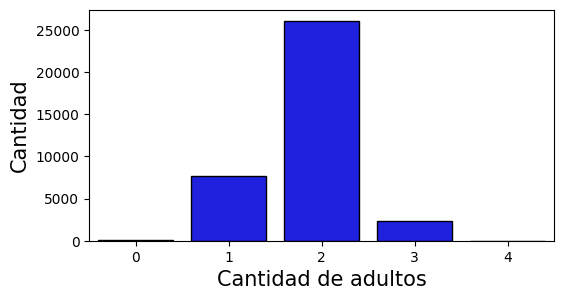

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))
ax= sns.countplot(x="no_of_adults", data=num_df,color = "blue",edgecolor = "black")
plt.xlabel('Cantidad de adultos', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

#Grafico univariable de la cantidad de adultos de cada reserva

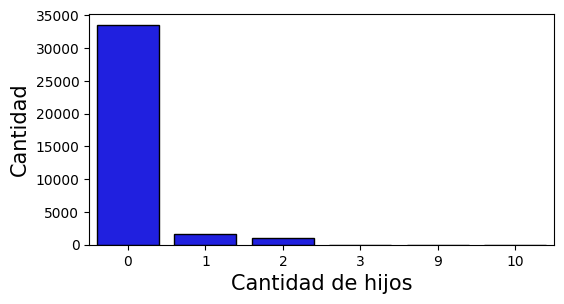

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))
ax= sns.countplot(x="no_of_children", data=num_df,color = "blue",edgecolor = "black")
plt.xlabel('Cantidad de hijos', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

#Grafico univariable de la cantidad de hijos de cada reserva

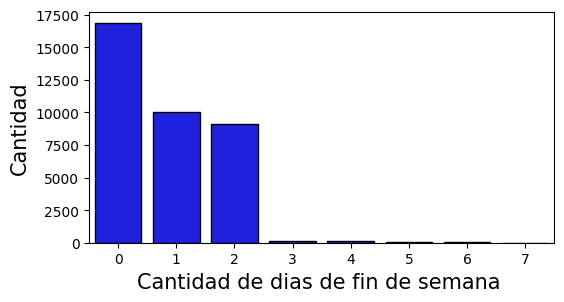

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))
ax= sns.countplot(x="no_of_weekend_nights", data=num_df,color = "blue",edgecolor = "black")
plt.xlabel('Cantidad de dias de fin de semana ', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

#Grafico univariable de la cantidad de días de fin de semana de cada reserva

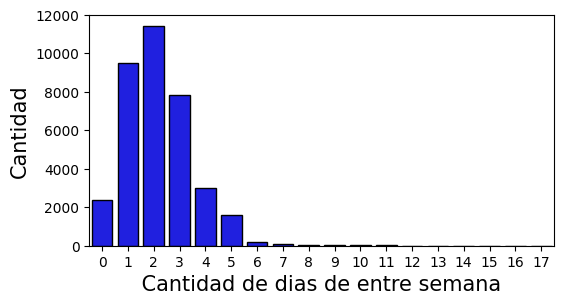

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))
ax= sns.countplot(x="no_of_week_nights", data=num_df,color = "blue",edgecolor = "black")
plt.xlabel(' Cantidad de dias de entre semana ', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

#Grafico univariable de la cantidad de días de la semana de cada reserva

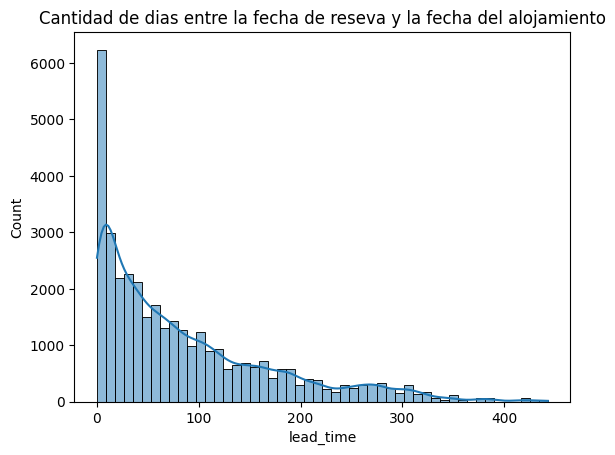

In [ ]:
sns.histplot(data= num_df, x='lead_time', kde=True,bins=50)
plt.title('Cantidad de dias entre la fecha de reseva y la fecha del alojamiento')
plt.show()

#Grafico univariable de la cantidad de días entre la fecha de reserva y el check in

In [ ]:
sns.histplot(data= num_df, x='no_of_special_requests', kde=True,bins=50)
plt.title('Cantidad de pedidos especiales')
plt.show()

#Grafico univariable de la cantidad de pedidos especiales

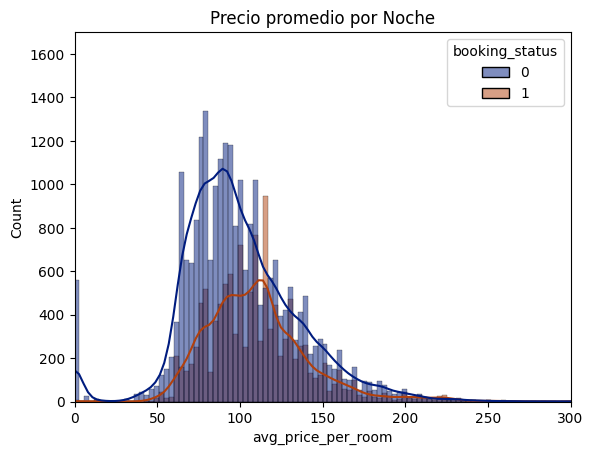

In [ ]:
sns.histplot(x="avg_price_per_room", hue="booking_status", data=df, kde=True, palette="dark",bins=180)
plt.ylim(0,1700)
plt.xlim(0,300)
plt.title("Precio promedio por Noche");

# Analizamos en una gráfica bivariable los precios por noche de alojamiento de acuerdo al estado de la reserva

In [ ]:
pd.pivot_table(df, index = 'booking_status', values = ['avg_price_per_room'])

#Verificamos el precio promedio por noche de acuerdo si la reserva fue cancelada o no.

,avg_price_per_room
booking_status,
0,99.931412
1,110.589966


Estamos buscando si existe alguna correlación para el Hotel de Mendoza entre el precio por noche de las reservas y la posibilidad de que la misma sea cancelada, tal como surgen los datos no existe una diferencia sustancial entre el precio de las reservas concretadas y las reservas canceladas.

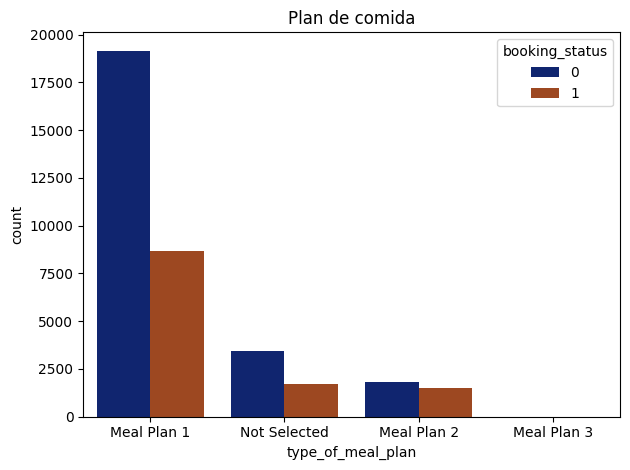

In [ ]:
sns.countplot(x='type_of_meal_plan', hue="booking_status", data=df, palette="dark")
plt.title("Plan de comida")
plt.tight_layout()

#Graficamos los planes de comida solicitados por los huéspedes según el estado de la reserva


Los planes de comida son un atractivo muy importante en los Hoteles, principalmente para los extranjeros que les gusta probar la comida autóctona de la zona, dentro del menú disponible del Hotel tenemos 3 planes de comida el cual es posible seleccionar al momento de la reserva, con el fin de tener todo listo para el día del alojamiento.
El menú que sobresale por su gran variedad de alimentos es el plan Nro 1, el cual es seleccionado mas del 80% de las veces.


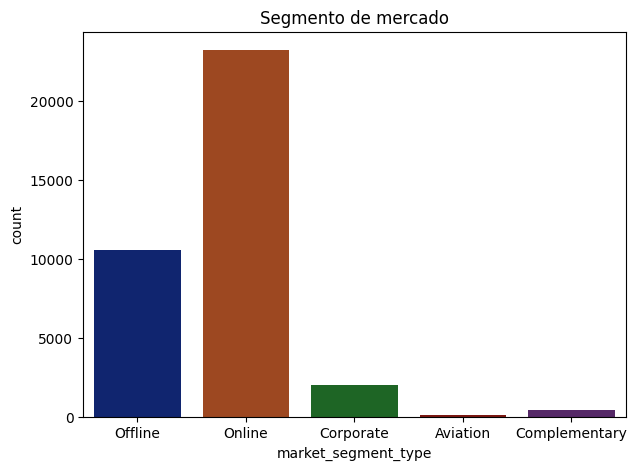

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='market_segment_type', data=df,palette="dark")
plt.title("Segmento de mercado")
plt.show()

#Analizamos los métodos de reserva utilizados para el base de datos disponible

Ante las nuevas tecnologías que disponemos dentro del Hotel, una de ella es la de gestionar a la reserva de forma online vía red social, WhatsApp o página web permitiendo al propio huésped realizar su reserva desde la comodidad de su hogar y disponer en vivo de la disponibilidad para asegurarle unas vacaciones placenteras.
Gracias a la inversión en sistemas de gestión de reservas, la cual funciona excelentemente, observamos que mas del 70% de las reservas se realizaron vía online, permitiendo una mejor logística para el Hotel y facilidad para el huésped.


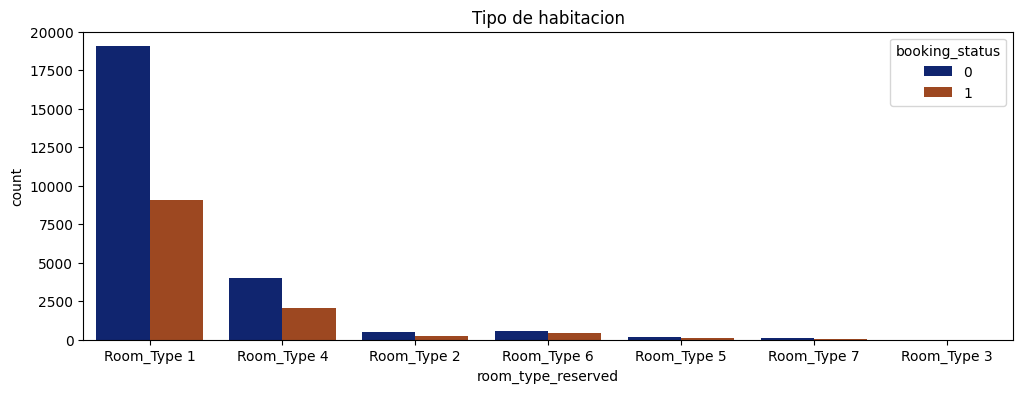

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(x='room_type_reserved', hue="booking_status", data=df, palette="dark")
plt.title("Tipo de habitacion")
plt.show()

#Analizamos las habitaciones más solicitadas por los huéspedes

El servicio por excelente de los Hoteles es brindar un hospedaje ameno a sus huéspedes y esto incluye una habitación acorde a las vacaciones que se merecen nuestros huéspedes. Para cumplir con los estándares esperados por los clientes, el Hotel ofrece 7 distintas habitaciones con diferencias capacidades y comodidades.
Asociado a la cantidad de adultos que suelen reservar alojamiento en el Hotel (2), notamos que la habitación Nro 1 y 4 son las mas frecuentadas.




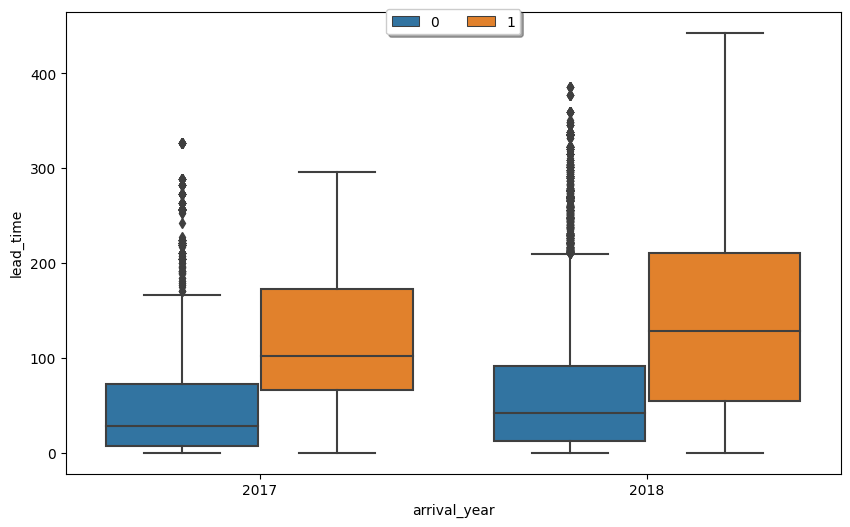

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="arrival_year", y= "lead_time", hue="booking_status")
plt.legend(loc = "upper center", bbox_to_anchor=(0.5,1.02),ncol=3, fancybox=True, shadow=True)

# Tomando la variable lead_time analizamos por año si existe una diferencia sustancial de acuerdo al estado de la reserva.

La cantidad de días entre que se reserva y la fecha de check in es muy importante para identificar las reservas que podrán ser canceladas (alta correlación), esto se puede dar por una mayor incertidumbre por parte del huésped y cambios de planes que puedan surgir.
Esto mismo se observó en el análisis realizado, las reservas mayores a 60 días tienen mayor tendencia a ser canceladas, tanto para el año 2017 como 2018.


Como era de esperarse para la provincia de Mendoza, reconocida mundialmente por su naturaleza y tranquilidad, durante las reservas realizadas en 2017-2018 su mayoría fueron para 2 adultos, siendo un lugar turístico muy importe para las parejas jóvenes de Argentina y países vecinos.

Asociada a esta hipótesis, observamos que la gran mayoría de reservas no incluye hijos menores, remarcando que se tratan de parejas jóvenes.

Al tratarse de un paisaje turístico fuera de las ciudades grandes de Argentina, las reservas se realizando tanto para los fines de semanas como días de semana con un promedio de 4-5 noches para gran parte de reservas, distribuido 2 días de fin de semana y 3 días de la semana.

Tal como era de esperarse, las reservas se suelen realizar con muchos días de antelación con el fin de asegurarse el alojamiento y evitar perderse sus vacaciones, siendo la cantidad de cancelaciones previas muy bajas y predominando las reservas online sobre las presenciales.

Mendoza es una zona turística que atrae muchas personas alrededor del mundo, por lo cual los precios pueden ir desde 50 USD a más de USD 250 la noche, ofreciendo una amplia gama de opciones para los huéspedes. Vinculado a esto, es habitual que se ofrezcan distintas opciones de comida, habitación o pedidos especiales con el fin de hacer amena la estadía.

# **Modelos de Machine Learning**

**Etapa inicial de los modelos - Definir las variables a utilizar**

En los pasos anteriores de modelado del Dataframe y EDA se definieron los parámetros y el objetivo de estudio. Se ha seleccionado como variable a predecir si una reserva será cancelada o no.

De todos los parámetros disponibles observamos que los que tienen mayor correlación son lead_time y no_of_special_requests.




In [ ]:
le = LabelEncoder()

for col in df.columns:
	if df[col].dtype == 'object':
		df[col] = le.fit_transform(df[col])

In [ ]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], downcast='unsigned')

df.info()

In [ ]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(df[Parametros], df[Objetivo])
sns.countplot(y)

# Separamos las variables en "X" e "y" en función de los parámetros y objetivo definido previamente

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Separamos los registros en Test y Train en una proporción 80% y 20%

In [ ]:
def plot_cm(model, X, y, format='.3f'):
    """Plot confusion matrix"""
    ConfusionMatrixDisplay.from_estimator(model, X, y,values_format=format,cmap='Blues',normalize='true')
    plt.show()

In [ ]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')
    y_pred = classifier.predict(X_test)
    yt_pred = classifier.predict(X_train)
    print('La exactitud del entrenamiento es:', accuracy_score(y_train, yt_pred))
    print('La exactitud del testeo es:', accuracy_score(y_test, y_pred))
    print('EL ROC del modelo es:', roc_auc_score(y_test,y_pred))

    return [(accuracy_score(y_train, yt_pred) * 100), (accuracy_score(y_test, y_pred) * 100),
            roc_auc_score(y_test, y_pred)]

# Creamos el modelo de evaluación que usaremos posteriormente

**MODELO 1 - DecisionTree**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
f1_score(y_test, y_pred)

#Analizamos los datos en un árbol de decisiones

0.8825985133896751

La exactitud del entrenamiento es: 0.9931836818368184
La exactitud del testeo es: 0.8818163181631816
EL ROC del modelo es: 0.8818094572404918


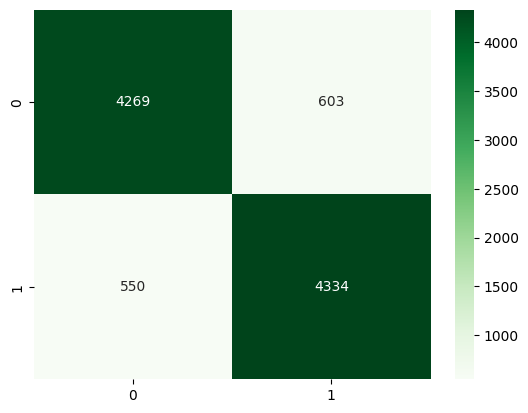

In [ ]:
dt1 = model_evaluation(dt)

#Aplicamos el modelo de evaluación al MODELO 1

**MODELO 2 - RandomForest**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
f1_score(y_test, y_pred)

#Analizamos los datos en un bosque aleatorio

0.907321114217666

La exactitud del entrenamiento es: 0.9931836818368184
La exactitud del testeo es: 0.9082615826158261
EL ROC del modelo es: 0.9082754384478523


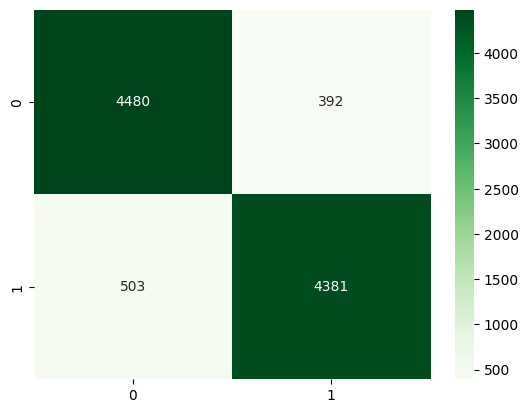

In [ ]:
rfc1 = model_evaluation(rfc)

#Aplicamos el modelo de evaluación al MODELO 2

**MODELO 3 - LogisticRegression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
f1_score(y_test, y_pred)

#Analizamos los datos en un modelo de regresión logística

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.788873038516405

La exactitud del entrenamiento es: 0.7877972529725297
La exactitud del testeo es: 0.7876178761787618
EL ROC del modelo es: 0.7876117552841692


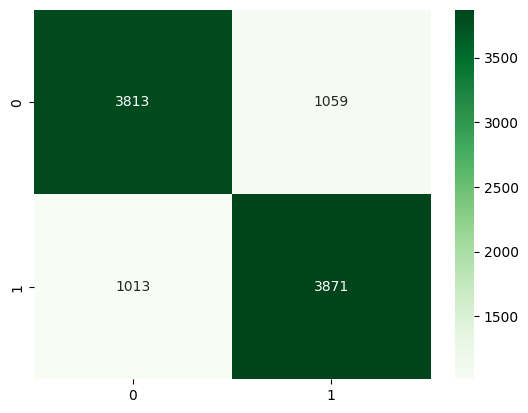

In [ ]:
lr1 = model_evaluation(lr)

#Aplicamos el modelo de evaluación al MODELO 3

**MODELO 4 - KNeighbors**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
f1_score(y_test, y_pred)

0.8465503568596352

La exactitud del entrenamiento es: 0.8981139811398114
La exactitud del testeo es: 0.8413284132841329
EL ROC del modelo es: 0.8412878283567938


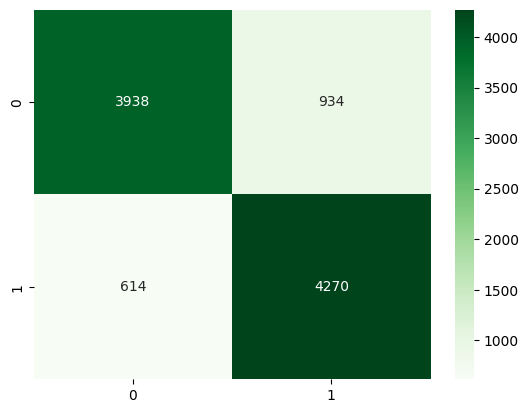

In [ ]:
knn1 = model_evaluation(knn)

In [ ]:
results = pd.DataFrame(data = [dt1, rfc1, lr1, knn1],
                       columns = ['Training Accuracy', 'Testing Accuracy', 'Roc_Auc Score'],
                      index = ['DecisionTreeClassifier',  'RandomForestClassifier','LogisticRegression','KNearestNeighbors'])

In [ ]:
results

,Training Accuracy,Testing Accuracy,Roc_Auc Score
DecisionTreeClassifier,99.318368,88.181632,0.881809
RandomForestClassifier,99.318368,90.826158,0.908275
LogisticRegression,78.779725,78.761788,0.787612
KNearestNeighbors,89.811398,84.132841,0.841288


***Conclusiones***


En base a los valores de la curva ROC de los modelos entrenados, el mejor Modelo es el de Random Forest que tiene un area bajo la curva de 90.82%, lo que indica que es un buen clasificador.

Se recomienda a los Hoteles influir en las caracteristicas que si pueden alterar, como son:

-Precio por noche/Promociones

-Estilo de habitacion

-Tipos de planes alimenticios

-Medios por los cuales se puede reservar

-Limitar los dias que se puede reservar con anticipacion









# **Variables sinteticas y PCA**

In [ ]:
#Preprocesamiento de los datos, separamos en X e y
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [ ]:
#Separo los datos en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
#Normalizo los datos de X
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Ajustamos los datos de X

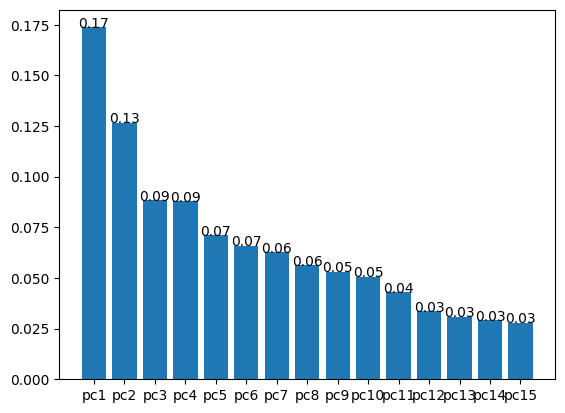

In [ ]:
#Análisis de la varianza por componente
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i],2), ha = 'center')

explained_variance = pca.explained_variance_ratio_
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']
plt.bar(names, explained_variance)
addlabels(names, explained_variance)

**Insights**:

Observamos que no existe un componenente principal que refleje la varianza.

In [ ]:
from sklearn.decomposition import PCA
#Usamos un único componente para calcular el Modelo predictivo
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

#Utilizamos el modelo RandomForest para el componente seleccionado

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.712474155754652


Observamos que la exactitud es muy baja

# **Modelo con validacion cruzada**

In [ ]:
Y = df["booking_status"]

# Definimos Y como el objetivo

In [ ]:
print(X.shape, Y.shape)

#Validamos los datos que tenemos en X e Y

(36275, 15) (36275,)


In [ ]:
cv = LeaveOneOut()

In [ ]:
model = RandomForestClassifier(random_state=1,n_estimators=30, criterion="gini",max_depth=4)

#Utilizamos el modelo de RandomForest para realizar la validación cruzada

In [ ]:
rfc.fit(X.values, Y.values)
#Ajustamos el modelo

RandomForestClassifier()

In [ ]:
print(rfc.score(X.values,Y.values))
#Calculamos el score del modelo

0.991592005513439


In [ ]:
print(cross_val_score(rfc, X.values,Y.values,cv=5).mean())
# Calculamos el score del modelo con validación cruzada

0.8883252929014473


El modelo de RandomForest nos da un 99,15% de acurracy, sin embargo al probarlo mediante validacion cruzada, presenta un acurracy mas preciso de 88,81%. Por lo cual, entendemos que estabamos sobreestimando nuestro modelo inicial.

# **Conclusiones finales**

#### Insights Hotel

* Existe una correlación positiva entre el plazo de antelación con la cual se reservó y la cantidad de cancelaciones, por lo cual es una variable a tener en cuenta,
* Como siguiente variable, los pedidos especiales pueden definir si una reserva se cancela o no.
* El precio de la noche no es una variable relevante, esto se puede deber al reducido margen entre el precio mínimo y máximo.
* Al tratarse de cancelaciones de reservas, esto suele darse por cambio de planes, mejores ofertas, entre otros.


#### Recomendaciones

* Evitar el 100% de las cancelaciones no están en manos del Hotel, dado que existen factores externos que no pueden ser manipulados. Debido a esto, el Hotel debe hacer hincapié en las variables que si puede manipular.

* Si el costo por perdidas de reservas es elevado para el Hotel, debería diseñar una alternativa de reserva que el permita recuperar al menos una parte de la reserva original.
